Please type your student name here:

# Nuclear Medicine Physics Lab 2

Designed by: Carlos Uribe, PhD, MCCPM

## Objectives

    1. Familiarize yourself with forward projection and backprojection.
    
    2. Implement 2 iterative reconstruction algorithms: MLEM and OSEM
    
    3. Understand and convert PET images to Standard Uptake Values

In [ ]:
#install libraries that we'll be using
!pip install phantominator pydicom matplotlib numpy

In [ ]:
#Download data if on google colab
!wget https://github.com/carluri/nucmed_physics_examples/raw/master/Lab2/suv.dcm

# Load libraries we'll be using throughout

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The Data

## Shepp-Logan Phantom

A phantom developed by Larry Shepp and Benjamin Logan.

Shepp, Larry A.; Logan, Benjamin F. (June 1974). "The Fourier Reconstruction of a Head Section" (PDF). IEEE Transactions on Nuclear Science. NS-21 (3): 21–43. Bibcode:1974ITNS...21...21A. doi:10.1109/TNS.1974.6499235. Archived from the original (PDF) on 2016-03-04.

In [1]:
# load the library
from phantominator import shepp_logan

In [5]:
# Create a "true image" of this phantom in a 256 x 256 matrix
true_img = shepp_logan(256)

### Display the phantom using a 'Greys_r' colormap and place the origin of the axes in the lower left corner:
Hint: look for the 'imshow' method available with matplotlib

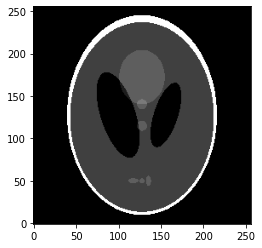

In [9]:
#complete the code to display the image below

# 1) Image Reconstruction

## Forward project and backprojection

Remember the Radon transform (i.e. the line integral to acquire a projection)

$p(x,\phi) = \int_{-\infty}^{\infty} f(x,y)dy $

And remember our example for Back-projection

![back-projection.png](https://github.com/carluri/nucmed_physics_examples/blob/master/Figures/backprojection.png?raw=true)



Let's use tools available with the scikit-image python library

In [11]:
# Radon is the method used to forward project
# iradon backprojects the data 
from skimage.transform import radon, iradon

### You will need to be able to generate different angles at which you want to obtain projections.

1) Use np.arange to generate an array from 0 to 179 degrees every one degree

2) Use np.arange to generate an array from 0 to 179 degrees every three degrees

In [23]:
#complete your code here to show the following result

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [24]:
#complete your code here to show the following result

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177])

### Assume you have a gamma camera that you will be using to collect projections of the Shepp-Logan phantom at every 3 degrees for half a full rotation. Store those angles in `proj_angles` 

In [25]:
proj_angles = #complete your code here

### Let's now FORWARD PROJECT the phantom and stack the projections together in a sinogram.
Use the `radon` method the you imported above. In the arguments of the function, make `preserve_range =True` and use the `proj_angles` defined above as your projection angles. The shape of your sinogram is shown below.

In [26]:
sino = #complete your code here
sino.shape

(256, 60)

### Display the sinogram by showing the projection angle on the vertical axis and the projection bin in the horizontal axis.
Hint: you might need the transpose method of numpy arrays.
e.g. `a.T`  
set the origin on the lower left corner
use the `Greys_r` colormap
extend the x axis from 0 to 256
extend the y axis from 0 to 180 degrees
see the effect of interpolation 

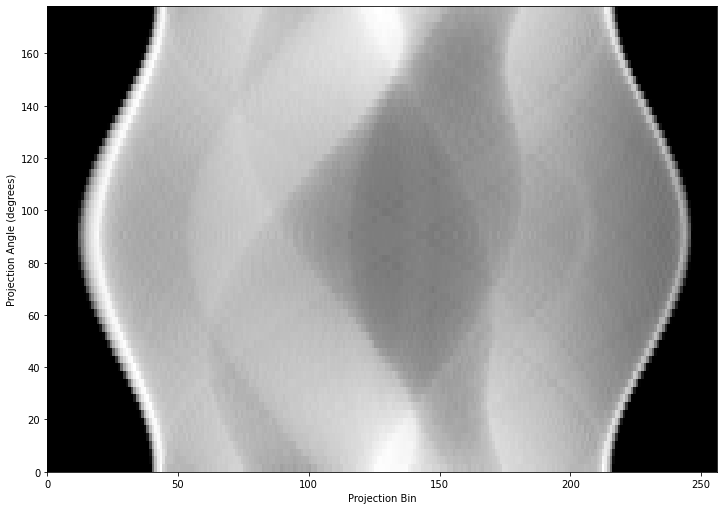

In [29]:
plt.figure(figsize=(12,16));
#substitute your code in this line to display the following image
plt.xlabel('Projection Bin');
plt.ylabel('Projection Angle (degrees)');

### Now use the sinogram above and reconstruct the image using the backprojection algorithm (i.e. no filter)
Hint: you can now use the `iradon` method that was imported earlier

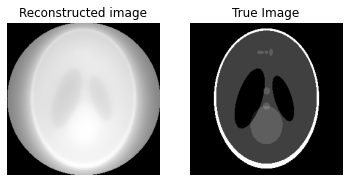

In [35]:
recon = #modify this line to save your reconstructed image in the recon variable

plt.subplot(1,2,1)
plt.imshow(recon,cmap='Greys_r');
plt.title('Reconstructed image');
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(true_img,cmap='Greys_r');
plt.title('True Image');
plt.axis('off');

### Now try using Filtered-Backprojection
Try the ramp, shepp-logan, cosine, hamming, and hann filters
Maybe even try running the code above again but now use more or less projection angles

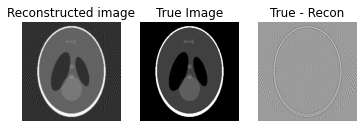

In [43]:
recon = #modify this line to save your reconstructed image in the recon variable

plt.subplot(1,3,1)
plt.imshow(recon,cmap='Greys_r');
plt.title('Reconstructed image');
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(true_img,cmap='Greys_r');
plt.title('True Image');
plt.axis('off');

plt.subplot(1,3,3)
plt.imshow(true_img - recon,cmap='Greys_r');
plt.title('True - Recon');
plt.axis('off');

## Iterative Reconstruction

![iterative_recon.png](https://github.com/carluri/nucmed_physics_examples/blob/master/Figures/iterative_recon.png?raw=true)

## Maximum Likelihood Expectation Maximization (MLEM)

![mlem_equation.png](https://github.com/carluri/nucmed_physics_examples/blob/master/Figures/mlem_equation.png?raw=true)

### Before we get into coding, let's define the mean square error (MSE)
    

The MSE is the sum of the difference between the two images squared
![mse.png](https://github.com/carluri/nucmed_physics_examples/blob/master/Figures/mse_equation.png?raw=true)
       
This will be handy to see how good or bad is our estimated image

In [46]:
# code for this function taken from
#https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

#### Create the MLEM function

input: 

    a measured sinogram
    the number of iterations        
    the original image 
    the projection angles
        
output:

    the mean square error between reconstructed image and true image for each iteration

In [47]:
def mlem(measured_sino,n_it,original,proj_angles):
    
    # Define a sinogram filled with "ones" which we will use to normalize the data
    # and that has the same shape as the measured sinogram
    sino_ones = np.ones(measured_sino.shape)
    
    # Backrpoject the sino_ones sinogram. Be careful to specify that no filter is required
    backproj_of_ones = # edit this line with your code
       
    # This will be the loop that will run the iterations
    for i in range(1,n_it+1):
        if i == 1:
            # create your first image estimate
            estimate = #modify this line to create your estimate
            
            # create an empty list to store the MSE
            mserr = []

            
        # Generate the forward projection (see what you did for backrpojection). Use the proj_angles
        # you obtained before. Preserve the range of the image
        
        forward_estimate = #modify this line with your code
        
        # now you will calculate the ratio between measured and estimated projections
        # hint: use the numpy.divide method. You will have issues if you divide by 0. 
        # check this link to help you solve that issue 
        # https://stackoverflow.com/questions/26248654/how-to-return-0-with-divide-by-zero
        
        ratio = #modify this line with your code
        
        # Now you need to backproject the "ratio sinogram"
        backproj = # modify this line with your code

        # Before generating the new estimate, visualize what you've been doing.
        # let's only show every 10th iteration
        if i==1 or i%10 == 0:
            plt.figure(figsize=(8,8))
            plt.subplot(2,3,1)
            plt.title(f'Estimate {i}')
            #add a line to show the current estimate
            plt.axis('off')
            
            
            plt.subplot(2,3,2)
            plt.title(f'Sinogram of Estimate')
            # add a line to show the estimated sinogram
            plt.axis('off')
            
            plt.subplot(2,3,3)
            plt.title(f'True - Estimate')
            # add a line to show the difference between original and estimated image
            plt.axis('off')
            
            plt.subplot(2,3,5)
            plt.title(f'Measured Sinogram')
            # add a line to show the measured sinogram
            plt.axis('off')

            
            plt.subplot(2,3,4)
            plt.title(f'Truth')
            # add a line to show the original image
            plt.axis('off')
            
            
            plt.subplot(2,3,6)
            plt.title(f'Measured/Estimate')
            #add a line to show the ratio of the measured and estimated sinogram
            
            
            plt.suptitle(f'Iteration {i}')
            plt.axis('off')
            plt.tight_layout()
            plt.show()
    
        
        # Now generate a new estimate
        # First multiply the current estimate by the backrpojected ratio of the sinograms
        # hint use np.multiply
        estimate = #modify this line with your code
        
        #now you need to normalize the new image to maintain the number of counts
        estimate = # modify this line with your code
        
        # append the current mse to this iteration
        mserr.append(mse(original,estimate))
        
    return mserr

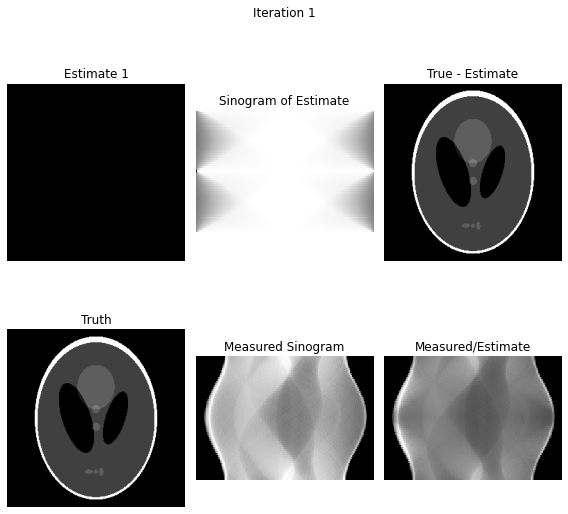

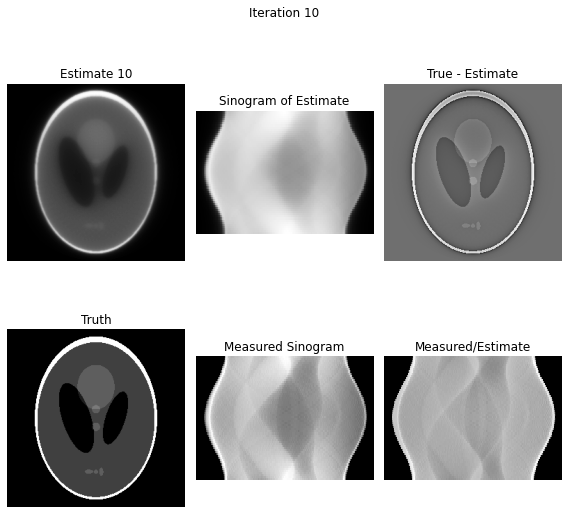

In [50]:
# run your function, test a different nubmer of iterations. Play with your code and try
#to understand what is happening at each step
mlem_mse = #edit this line with your code

In [ ]:
# plot the MSE and try to explain in the next cell what you see
plt.plot(range(len(mlem_mse)),mlem_mse)
plt.xlabel("Iteration")
plt.ylabel('MSE')
plt.title('MSE vs. Iterative Updates');

Explain your results from the plot above in this cell

## Ordered Subset Expectation Maximization OSEM
![osem_equation.png](https://github.com/carluri/nucmed_physics_examples/blob/master/Figures/osem_equation.png?raw=true)

### OSEM will use subsets of the projections for each iteration. First we need a way of generating subsets from the projection angles

In [70]:
subsets = {}
n_subsets = 10
for s in range(n_subsets):
    if not len(proj_angles) % n_subsets:
        subsets[s] = proj_angles[s::n_subsets]
    else:
        print("Number of subsets should be a divisor of the total number of projections.")
        break

In [71]:
proj_angles

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177])

In [72]:
subsets

{0: array([  0,  30,  60,  90, 120, 150]),
 1: array([  3,  33,  63,  93, 123, 153]),
 2: array([  6,  36,  66,  96, 126, 156]),
 3: array([  9,  39,  69,  99, 129, 159]),
 4: array([ 12,  42,  72, 102, 132, 162]),
 5: array([ 15,  45,  75, 105, 135, 165]),
 6: array([ 18,  48,  78, 108, 138, 168]),
 7: array([ 21,  51,  81, 111, 141, 171]),
 8: array([ 24,  54,  84, 114, 144, 174]),
 9: array([ 27,  57,  87, 117, 147, 177])}

### Similar to what was done for MLEM, try to code a function for OSEM

input: 

    a measured sinogram
    the number of iterations        
    the original image 
    the projection angles
    the subsets to use (you can also try to incorporate the code above within the function to input
    the number of desired subsets instead. You can try this later)
        
output:

    the mean square error between reconstructed image and true image for each iteration

In [ ]:
def osem(measured_sino,n_it,original,proj_angles,subsets):
    
    # start a counter to keep track of the iterative updates   
    s_ind = 0
    
    # start the loop to iterate
    for i in range(1,n_it+1):
        
        if i == 1:
            # create your first image estimate
            estimate = #modify this line to create your estimate
            
            # create an empty list to store the MSE
            mserr = []
         
    # start the loop to iterate over the subsets, i.e. only use certain projection angles
        for s in subsets.values():
            
            # because each subset has few angles, we need to define a way of finding the corresponding
            #angle. The indices provide the index within a subset that correspond to a particular angle
            indices = np.in1d(proj_angles,s) 
            
            # Take only the projections at the angle of the current subset
            sampled_sino = sino[:,indices]            
            
            # Generate the forward projection (see what you did for backrpojection). Use the proj_angles
            # you obtained before. Preserve the range of the image. 
            # Hint:You now need to forward project on certain angles theta
            
            forward_estimate = #modify this line with your code
            
            # now you will calculate the ratio between measured and estimated projections of the 
            # subsampled sinograms
            
            ratio = #modify this line with your code

            # Now you need to backproject the "ratio sinogram". Again, be careful as now you will have
            # to do this for the corresponding angles in the subset
            backproj = iradon(ratio,theta=s,filter_name=None)
            
            # There are more efficient ways of doing this step, but here we are trying to be
            # very explicit.
            # Create a sinogram of ones with the same shape as the measured sinogram
            sino_ones = np.ones(measured_sino.shape)
            # Backproject this sinogram only using the subset angles 
            backproj_of_ones = iradon(sino_ones[:,indices],filter_name=None)
            
          
            # Now generate a new estimate
            # First multiply the current estimate by the backrpojected ratio of the sinograms
            # hint use np.multiply
            estimate = #modify this line with your code
            estimate = #modify this line with your code
            
            # update the iterative updates counter
            s_ind+=1
            
            
            
            # generate plots on every 10 iterative updates 
            if s_ind==1 or s_ind%10 == 0:
                plt.figure(figsize=(8,8))
                plt.subplot(2,3,1)
                plt.title(f'Estimate {i}')
                plt.imshow(estimate,cmap='Greys_r',origin='lower')
                plt.axis('off')


                plt.subplot(2,3,2)
                plt.title(f'Sinogram of Estimate')
                plt.imshow(forward_estimate.T,cmap='Greys_r',origin='lower',extent=(0,sino.shape[0],0,max(proj_angles)+1),interpolation='none')
                plt.axis('off')

                plt.subplot(2,3,3)
                plt.title(f'True - Estimate')
                plt.imshow(original - estimate, cmap='Greys_r',origin='lower')
                plt.axis('off')

                plt.subplot(2,3,5)
                plt.title(f'Measured Sinogram')
                plt.imshow(sampled_sino.T,cmap='Greys_r',origin='lower',extent=(0,sino.shape[0],0,max(proj_angles)+1),interpolation='none')
                plt.axis('off')


                plt.subplot(2,3,4)
                plt.title(f'Truth')            
                plt.imshow(original,cmap='Greys_r',origin='lower')
                plt.axis('off')


                plt.subplot(2,3,6)
                plt.title(f'Measured/Estimate')
                plt.imshow(ratio.T,cmap='Greys_r',origin='lower',extent=(0,sino.shape[0],0,max(proj_angles)+1),interpolation='none')


                plt.suptitle(f'Iterative update {s_ind}')
                plt.axis('off')
                plt.tight_layout()
                plt.show()
                
        mserr.append(mse(original,estimate))

    return mserr

/home/carluri/miniconda3/envs/phys541/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


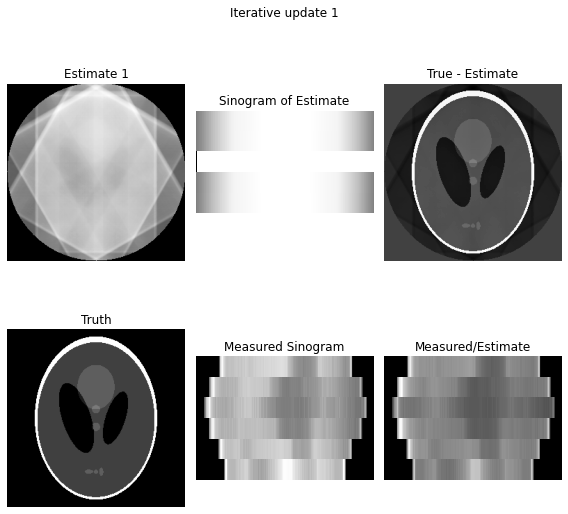

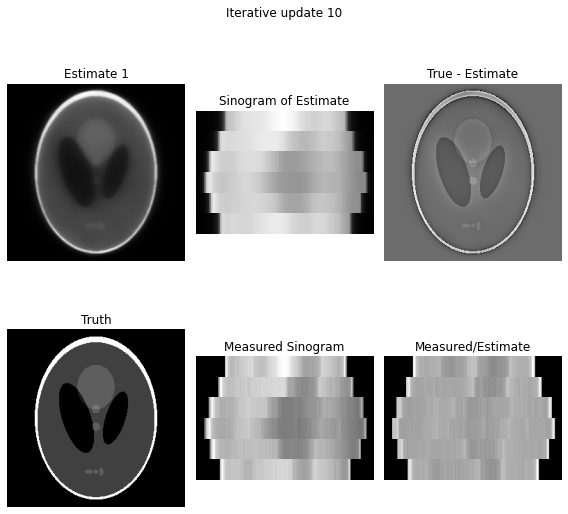

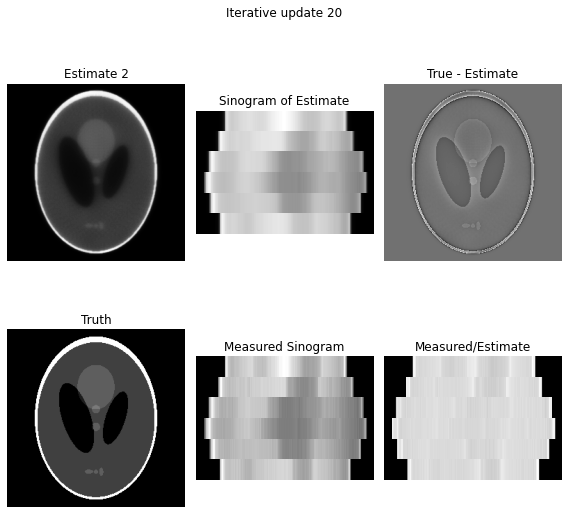

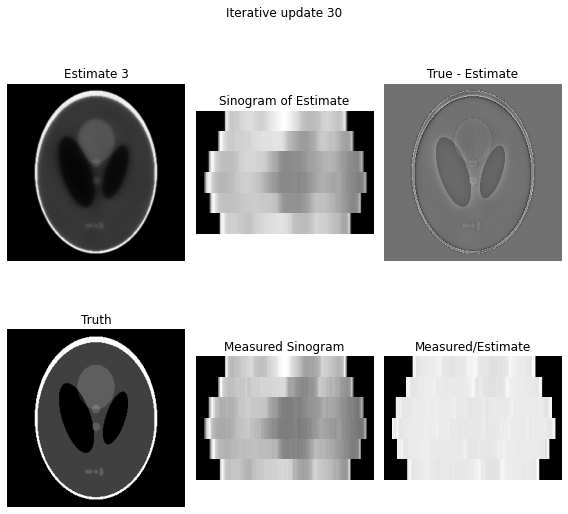

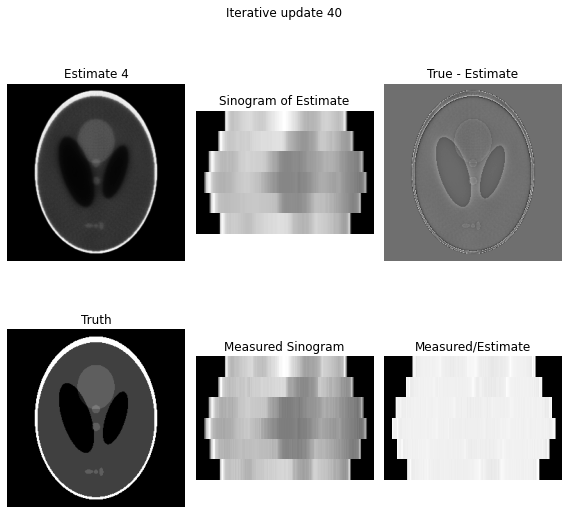

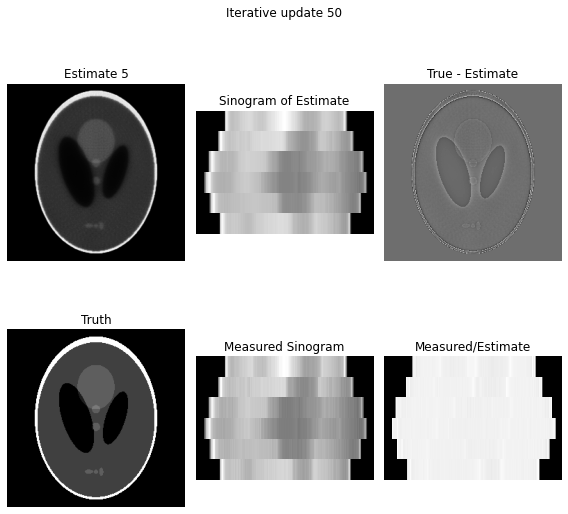

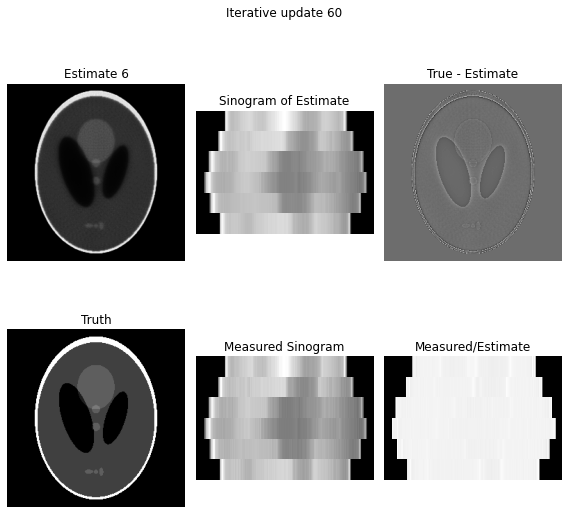

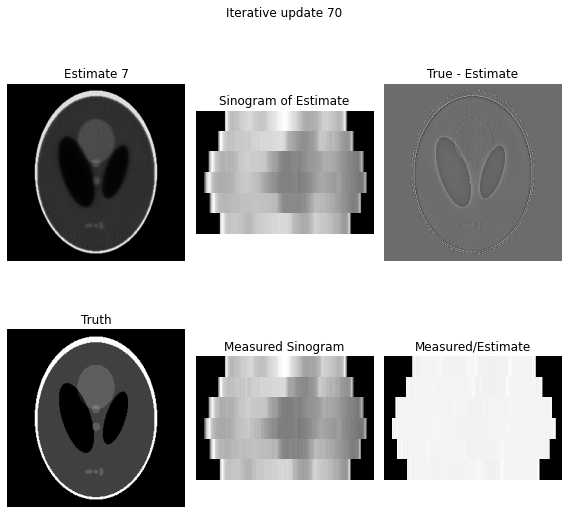

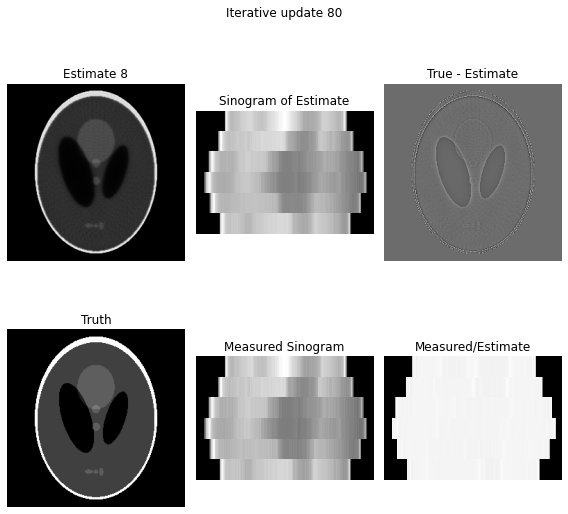

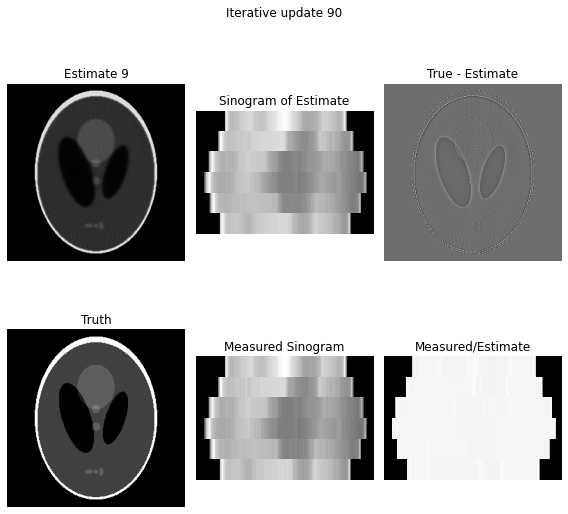

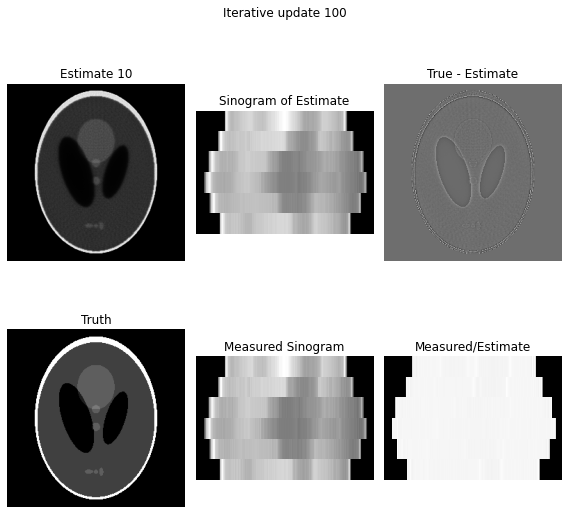

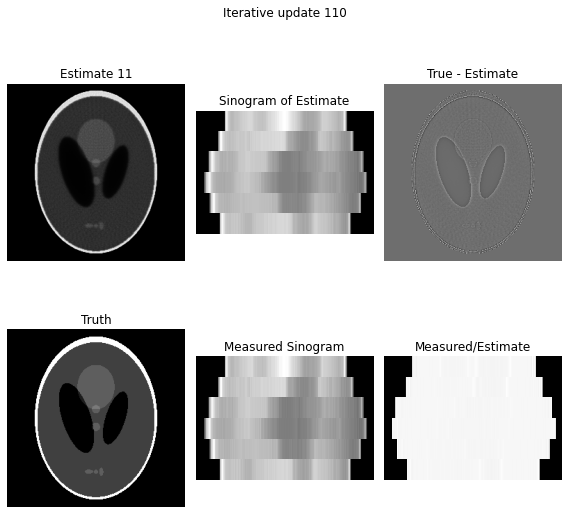

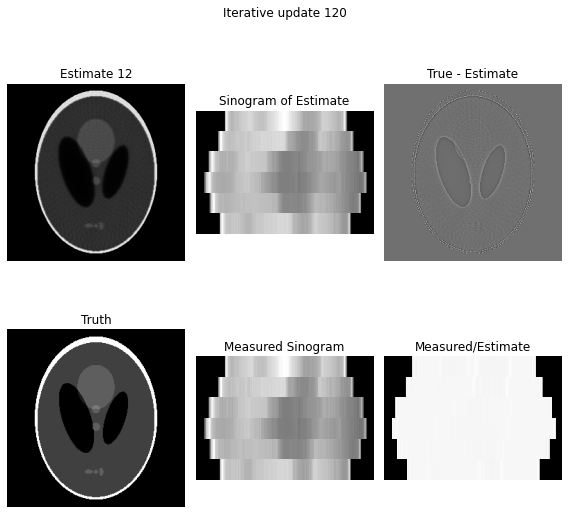

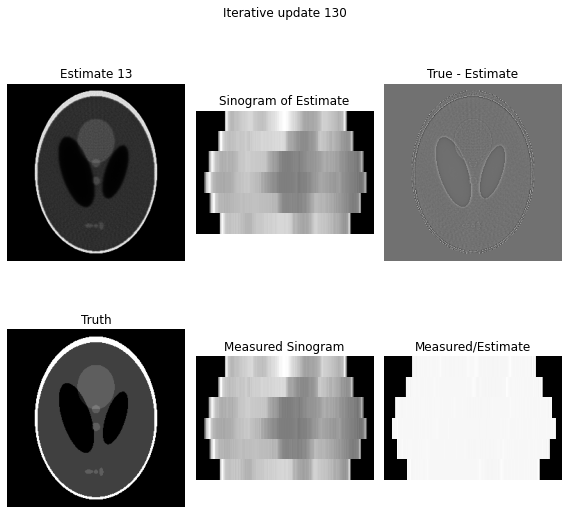

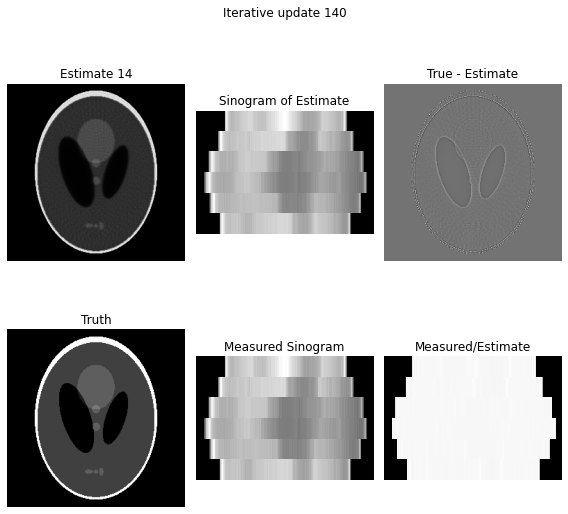

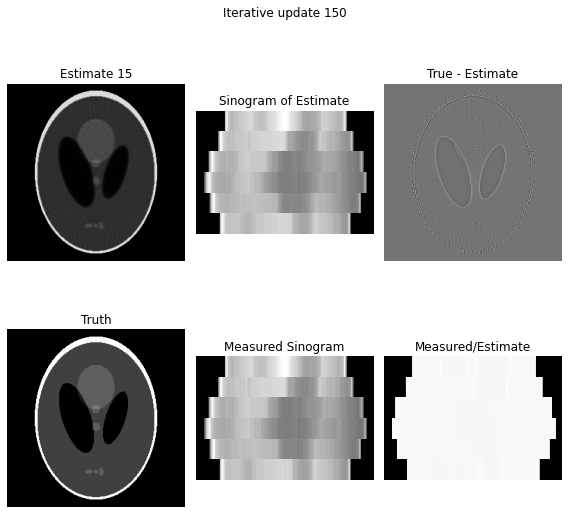

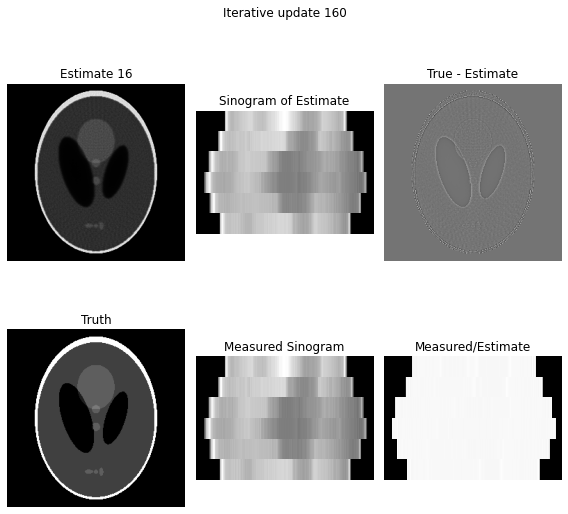

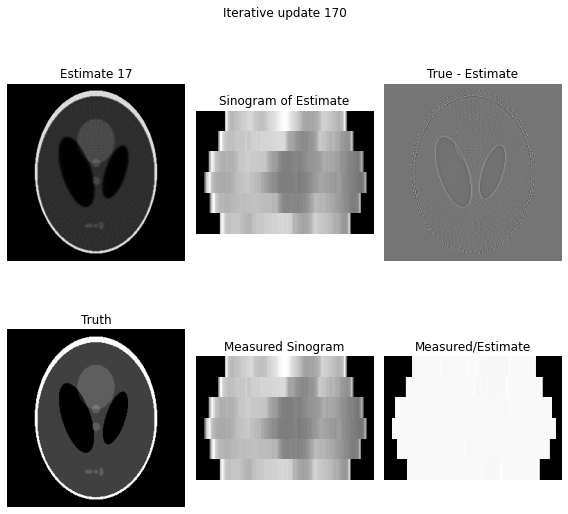

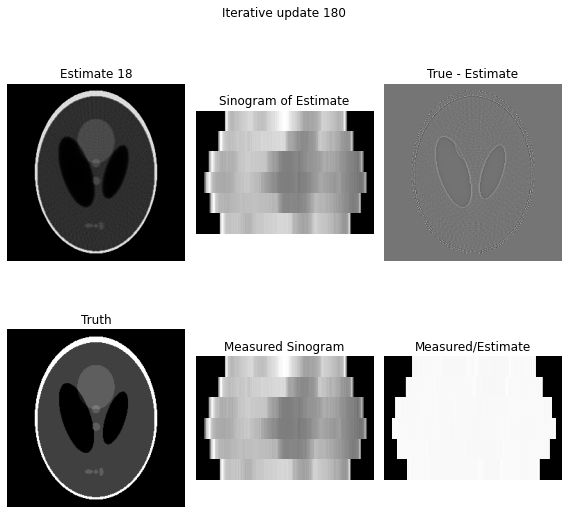

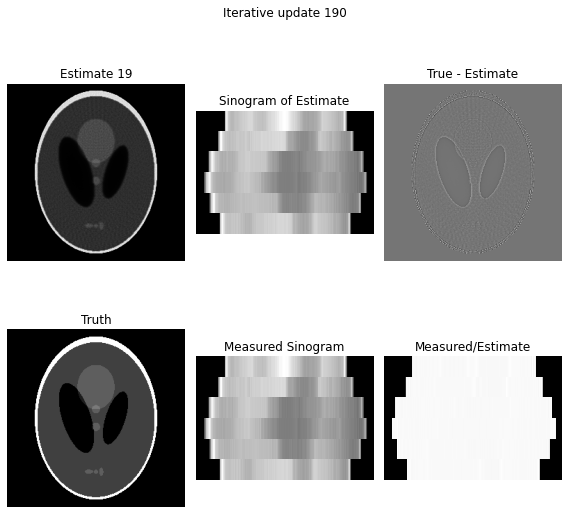

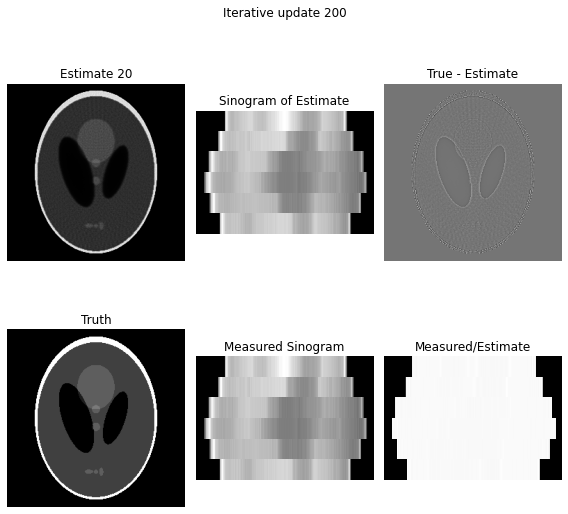

In [74]:
# run your function, test a different nubmer of iterations maybe even also a different number of subsets.
#Play with your code and try to understand what is happening at each step
osem_mse = #replace this line with your code to run OSEM

In [ ]:
# plot the MSE of both MLEM and OSEM
# what do you think?
plt.plot(range(len(osem_mse)),osem_mse)
plt.plot(range(len(mlem_mse)),mlem_mse)
plt.xlabel("Iterations")
plt.ylabel('MSE')
plt.title('MSE vs. Iterations');

write an short answer analyzing the mse of your two recon algorithms

# 2) Standard Uptake Value (SUV)

$SUV = \frac{Tissue Concentration [MBq/ml]}{Injected Activity [MBq] / Patient Mass [g]}$

### Import the libraries needed for this part

In [107]:
import pydicom
from skimage.measure import find_contours
from datetime import datetime

### Similar to Lab #1, load the `suv.dcm` dicom file contained in the current folder

In [88]:
ds = #modify this line to load the dataset into the variable ds

### Similar to Lab #1, load the image data into the `img` variable

In [83]:
img = # modify this line to load the image data

### Display the image using the `Greys` colormap

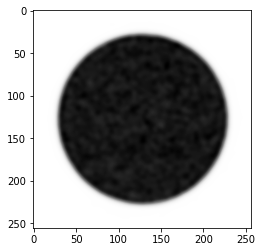

In [85]:
#modify this line to display the image as shown below

### Let's look into a way to change our image from "pixel units" to "data units"

In [89]:
# Load dimensions based on the number of columns (x), rows (y), and slices (Z axis)
ConstPixelDims = (int(ds.Columns), int(ds.Rows), 1)

# Load spacing values (in mm)
ConstPixelSpacing = (float(ds.PixelSpacing[0]), float(
        ds.PixelSpacing[1]), float(ds.SliceThickness))

max_xy = (np.array(ConstPixelDims)-1)*ConstPixelSpacing/2

# Create the linearspace in data coordinates for the x and y axis
x = np.linspace(-max_xy[0], max_xy[0], ConstPixelDims[0])
y = np.linspace(-max_xy[1], max_xy[1], ConstPixelDims[1])

# the z position is given in the header
z = float(ds.SliceLocation)

image_grid = (x, y, z)

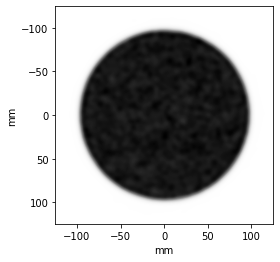

In [92]:
plt.imshow(img,cmap='Greys',extent=(image_grid[0][0], image_grid[0][-1], image_grid[1][-1], image_grid[1][0]));
plt.xlabel('mm');
plt.ylabel('mm');

### It would be great to measure something from the image.Binary masks are great for this, but here is a method to generate masks using functions

In [93]:
# create a grid to easily make a mask
xx, yy = np.meshgrid(image_grid[0], image_grid[1], sparse=False)

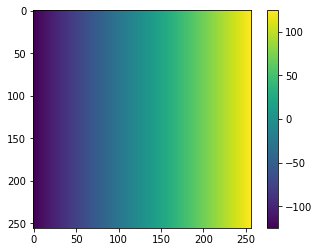

In [96]:
plt.imshow(xx)
plt.colorbar()

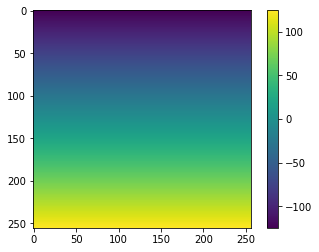

In [97]:
plt.imshow(yy)
plt.colorbar()

In [101]:
mask = (xx > 0) & (yy > 0)

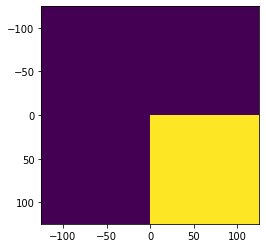

In [102]:
plt.imshow(mask,extent=(image_grid[0][0], image_grid[0][-1], image_grid[1][-1], image_grid[1][0]))

### Can you create a mask that corresponds to a circle centered at the origin and with a radius of 60 mm?

In [104]:
mask = # replace this line to create the circular mask

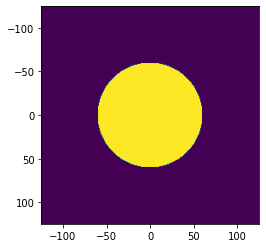

In [105]:
plt.imshow(mask,extent=(image_grid[0][0], image_grid[0][-1], image_grid[1][-1], image_grid[1][0]))

### Here's a method to obtain the countour of the mask and plot it over the image

In [108]:
 # find the contours in the binary mask
contours = find_contours(mask, 0.5)
contours[0][:, 1] = (contours[0][:, 1])*hdr.PixelSpacing[0]+hdr.ImagePositionPatient[0]
contours[0][:, 0] = (contours[0][:, 0])*hdr.PixelSpacing[1]+hdr.ImagePositionPatient[1]

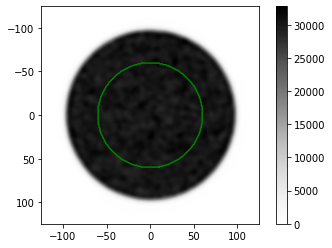

In [110]:
plt.imshow(img,cmap='Greys',extent=(image_grid[0][0], image_grid[0][-1], image_grid[1][-1], image_grid[1][0]));
plt.plot(contours[0][:,1],contours[0][:,0],color='green');
plt.colorbar();

### Let's check  what is the data type of the loaded image

In [111]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

### DICOM images like this one shown is stored as 16 bit integers, so "true values" are obtained by using the `RescaleSlope` and `RescaleIntercept` field given in the header. Each manufacturer might have a slightly different way of calculating these values.

What are the slope and intercept for this particular image?

In [ ]:
slope = #modify this line to find the slope
slope

In [ ]:
intercept = #modify this line to find the intercept
intercept

### Because our current image type is an integer and rescaling will most certainly generate some float numbers, is important to change the image type to `float` so that no information is lost. This can be done as follows

In [ ]:
img = img.astype(float)
img

### Now that you have your image as a float, you can rescale it using the slope and intercept as you would in a linear equation

$y = mx +b$

### rescale your image to obtain the measured values corresponding to a physical quantity

In [ ]:
img = # Modify this line to rescale your image

### You can now use the created mask to slice the image matrix and select only the pixels that are "True"

In [ ]:
img[mask].sum()

### Try calculating the mean and max value of that region of the image

In [ ]:
img_max = #replace this line to find the maximum value
img_max

In [ ]:
img_meam = #replace this line to find the maximum value
img_mean

### What are the units of the values you just listed above?

In [113]:
# change this line to show the units of your image

## Let's now show our image in SUV units. As a reminder SUV is defined as

$SUV = \frac{Tissue Concentration [MBq/ml]}{Injected Activity [MBq] / Patient Mass [g]}$

### Start by finding the mass of the patient (phantom in this case). Please note that you want that mass in grams

In [ ]:
body_mass = #Finish this line to obtain the mass in grams

### For information about injected activity the `RadiopharmaceuticalInformationSequence` from the DICOM file will be very handy. Explore this field below

In [ ]:
# Display the hdr.RadiopharmaceuticalInformationSequence of the loaded dataset

### And now let's create a function that given a dicom header it returns the image in SUV units

In [ ]:
def suvbw(hdr, bm):
    '''Returns an image in units of SUV based on body weight.This function is based on the calculation described in the Quantitative Imaging Biomarkers Alliance 
    for the Vendor-neutral pseudo-code for SUV Calculation - extracted "happy path only". http://qibawiki.rsna.org/index.php/Standardized_Uptake_Value_(SUV)

    INPUT: 
            hdr: (object)
                the header of the DICOM slice

            bm: (float)
                the mass of the patient or object in grams. This is usually obtained from the header but in some cases (e.g. phantom scans) it is convenient to specify it manually due to rounding introduced by the scanner

    OUTPUT: suvbw_img: (numpy.ndarray) 
            matrix that contains the pixel information in "SUVbw" units (i.e. (Bq/ml)/(Bq/g)
    '''

    if ('ATTN' in hdr.CorrectedImage and 'DECY' in hdr.CorrectedImage) and hdr.DecayCorrection == 'START':
        if hdr.Units == 'BQML':
            
            # You will need to do some decay correction. Use the RadiopharmaceuticalInformationSequence
            # to obtain the half life of the radioisotope injected
            
            half_life = #modify this line to obtain the half-life in seconds

            #you also need to know the time at which this series was acquired
            scan_time = #modify this line to find the time of scan for this series
            
            # It's also important to know at what time was the injection performed. See the hdr.RadiopharmaceuticalInformationSequence
            #again to find that time 
            start_time = #modify this line to get the injection time

            # convert tref and injtime from strings to datetime
            scan_time = datetime.strptime(scan_time.split('.')[0], '%H%M%S')
            start_time = datetime.strptime(start_time.split('.')[0], '%H%M%S')
            
            # You now need to know what was the time of decay. You're trying to decay the activity to the scan time.
            decay_time = scan_time - start_time

            # You need to know how much activity was injected. Again find it in the RadiopharmaceuticalInformationSequence
            inj_act = #edit this line to get the injected activity
            
            # Now you can apply the decay correction
            decayed_act = inj_act * 2**(-decay_time.total_seconds()/half_life)
            
            # Use the input bm and the decayed activity to find the factor by which the image from the header needs to be
            # multipled for to obtain values in "SUV"
            SUVbw_scale_factor = #modify this line to obtain the scale factor
            
            # lastly, load the pixel array from the dicom data, rescale it to the appropriate float values, and 
            #multiply the SUV scale factor you just calculated to obtain the image in SUV
            suvbw_img = #modify this line
            
            
            # return the image
            return suvbw_img

### Now call your fuction and save the new image in `img_suv`

In [ ]:
img_suv = suvbw(ds,bm)

### Display the image again, notice any difference with the color bar you had before?

In [ ]:
plt.imshow(img_suv,cmap='Greys',extent=(image_grid[0][0], image_grid[0][-1], image_grid[1][-1], image_grid[1][0]));
plt.plot(contours[0][:,1],contours[0][:,0],color='green')
plt.colorbar()

### Lastly, calculate the mean and the max SUV in the circular region that you have already created

In [ ]:
suv_max = #modify this line to obtain the SUVmax
suv_max

In [ ]:
suv_mean = #modify this line to obtain the SUVmean
suv_mean